In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import folium # 지도 시각화 도구
import fiona
import geopandas as gpd
from shapely.geometry import Polygon

import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import lxml
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time

### 세종시 지도 시각화

In [227]:
geo = gpd.read_file('./dataset/세종시_읍면동_경계.geojson', encoding='utf-8')
geo = geo[geo['sidonm'] == '세종특별자치시']

In [228]:
geo.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry
1136,1143,세종특별자치시 세종시 조치원읍,2901011,3611025000,36110,36,세종특별자치시,세종시 조치원읍,세종시,29010110,"MULTIPOLYGON (((127.30161 36.58212, 127.30141 ..."
1137,1145,세종특별자치시 세종시 연동면,2901032,3611032000,36110,36,세종특별자치시,세종시 연동면,세종시,29010320,"MULTIPOLYGON (((127.32190 36.58265, 127.32196 ..."
1138,1146,세종특별자치시 세종시 부강면,2901033,3611033000,36110,36,세종특별자치시,세종시 부강면,세종시,29010330,"MULTIPOLYGON (((127.37706 36.56744, 127.37617 ..."
1139,1148,세종특별자치시 세종시 장군면,2901035,3611035000,36110,36,세종특별자치시,세종시 장군면,세종시,29010350,"MULTIPOLYGON (((127.21853 36.55281, 127.21882 ..."
1140,1149,세종특별자치시 세종시 연서면,2901036,3611036000,36110,36,세종특별자치시,세종시 연서면,세종시,29010360,"MULTIPOLYGON (((127.25867 36.61878, 127.25964 ..."


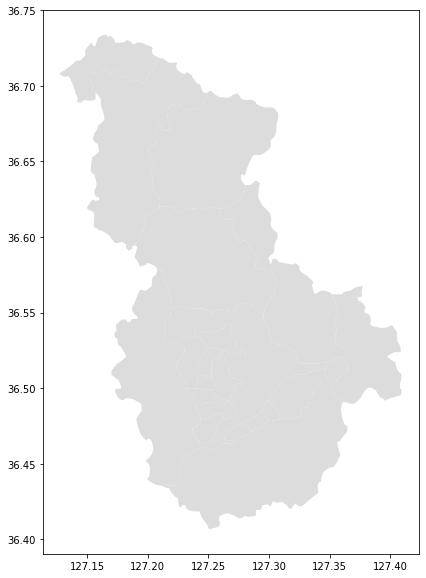

In [231]:
plt.rcParams["figure.figsize"] = (10,10)
ax = geo.plot(column='adm_cd', color='gainsboro')
#ax.set_axis_off()
plt.show()

### 세종시 인구밀도 (100m x 100m) 시각화

In [6]:
c = fiona.open('./dataset/202204_세종시_인구_격자_100m/세종시_인구_격자_100m.shp', encoding='utf8')
population_100m = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:5179')
population_100m.head()

,geometry,gid,lbl,val
0,"POLYGON ((977800.000 1828600.000, 977800.000 1...",다바778286,N/A,0.0
1,"POLYGON ((990100.000 1837300.000, 990100.000 1...",다바901373,N/A,0.0
2,"POLYGON ((980600.000 1843000.000, 980600.000 1...",다바806430,27.00,27.0
3,"POLYGON ((983800.000 1830600.000, 983800.000 1...",다바838306,N/A,0.0
4,"POLYGON ((969300.000 1857700.000, 969300.000 1...",다바693577,27.00,27.0


In [7]:
population_100m = population_100m[['geometry', 'val']]
population_100m.fillna(0).head()

,geometry,val
0,"POLYGON ((977800.000 1828600.000, 977800.000 1...",0.0
1,"POLYGON ((990100.000 1837300.000, 990100.000 1...",0.0
2,"POLYGON ((980600.000 1843000.000, 980600.000 1...",27.0
3,"POLYGON ((983800.000 1830600.000, 983800.000 1...",0.0
4,"POLYGON ((969300.000 1857700.000, 969300.000 1...",27.0


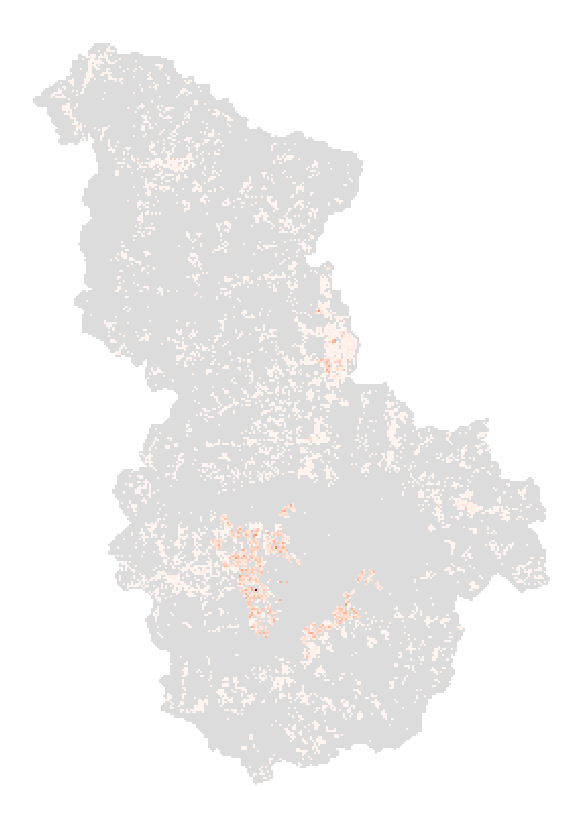

In [8]:
fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white') ## 캔버스 색상 설정

population_100m.plot(ax=ax1, color='gainsboro')
population_100m.plot(ax=ax1, column='val', cmap='Reds')
ax1.set_axis_off()
plt.show()

#### 인구 밀도 확인이 어려움 -> 데이터 확인

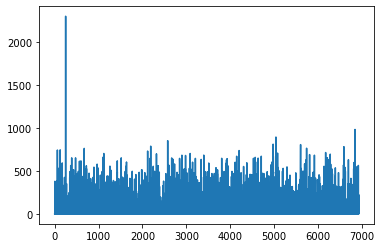

In [9]:
plt.plot(population_100m['val'])
plt.show()

In [10]:
population_100m[population_100m['val'] > 1000]

,geometry,val
250,"POLYGON ((977600.000 1832700.000, 977600.000 1...",2296.0


#### 확인이 더 쉽도록 인구가 유난히 높은 곳을 제거

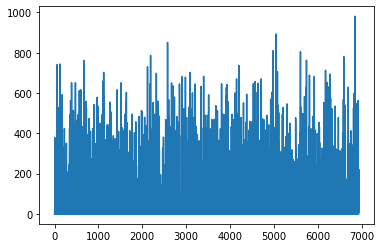

In [11]:
po_100m_1 = population_100m.drop(population_100m[population_100m['val']>1000].index)
plt.plot(po_100m_1['val'])
plt.show()

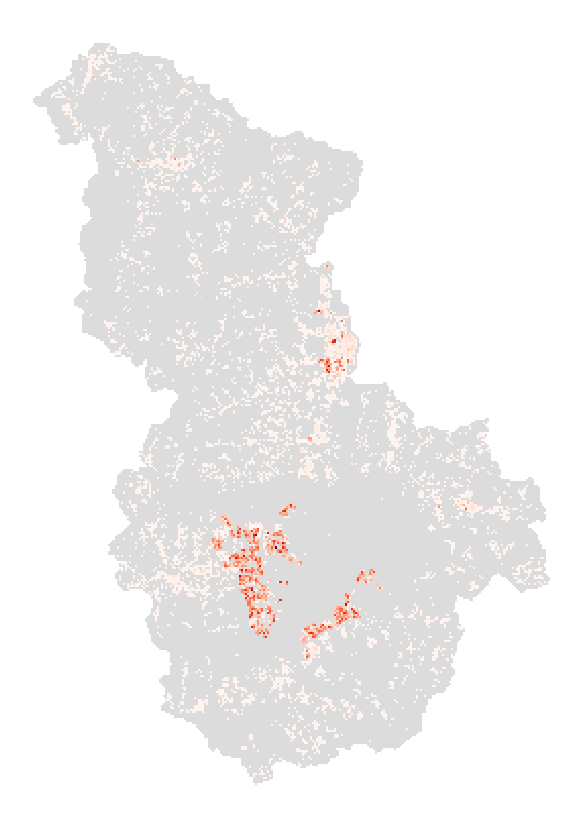

In [12]:
fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white') ## 캔버스 색상 설정

po_100m_1.plot(ax=ax1, color='gainsboro')
po_100m_1.plot(ax=ax1, column='val', cmap='Reds')
ax1.set_axis_off()
plt.show()

### 세종시 건축물수 (100m x 100m) 시각화

In [13]:
c = fiona.open('./dataset/202205_세종시_건축물수_격자_100m/세종시_건축물수_100m.shp', encoding='utf-8')
structure_100m = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:5179')
structure_100m.head()

,geometry,gid,lbl,val
0,"POLYGON ((990100.000 1837300.000, 990100.000 1...",다바901373,1.00,1.0
1,"POLYGON ((969300.000 1857700.000, 969300.000 1...",다바693577,20.00,20.0
2,"POLYGON ((977800.000 1828800.000, 977800.000 1...",다바778288,2.00,2.0
3,"POLYGON ((975800.000 1835000.000, 975800.000 1...",다바758350,3.00,3.0
4,"POLYGON ((971500.000 1853500.000, 971500.000 1...",다바715535,1.00,1.0


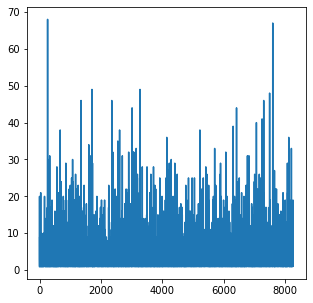

In [14]:
structure_100m.fillna(0)

fig = plt.subplots(figsize=(5, 5))
plt.plot(structure_100m['val'])
plt.show()

#### 60이상인 행을 제거

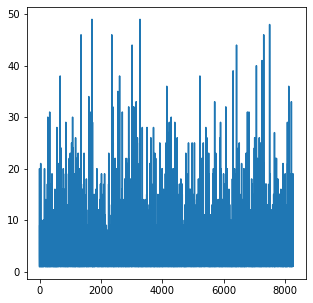

In [15]:
st_100m_1 = structure_100m.drop(structure_100m[structure_100m['val']>60].index)
fig = plt.subplots(figsize=(5, 5))
plt.plot(st_100m_1['val'])
plt.show()

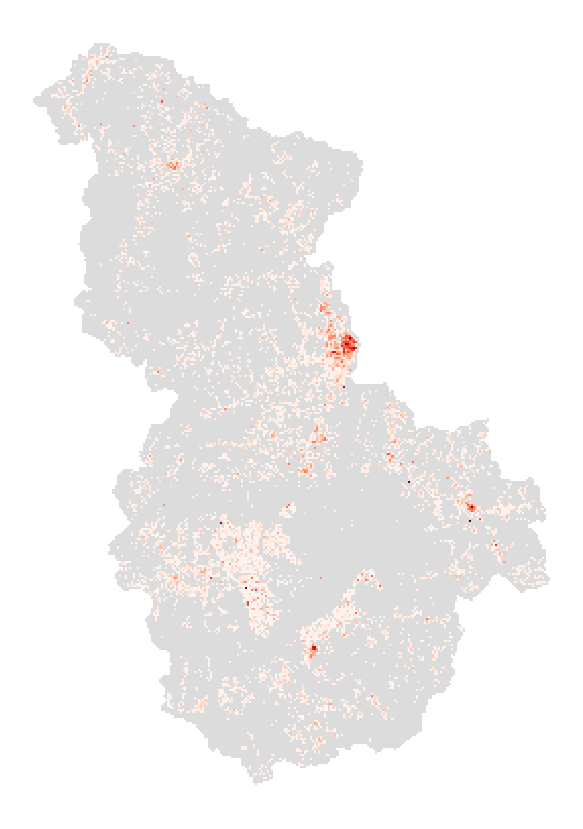

In [16]:
fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white') ## 캔버스 색상 설정

st_100m_1.plot(ax=ax1, color='gainsboro')
st_100m_1.plot(ax=ax1, column='val', cmap='Reds')
ax1.set_axis_off()
plt.show()

### 세종시 주차장 접근성 (500m x 500m)

In [17]:
c = fiona.open('C:/Users/sajah/Desktop/develop/python/데이터청년캠퍼스/프로젝트/데이터/2020_세종시_주차장_접근성_격자_500m/주차장_접근성.shp', encoding='utf-8')
parking_500m = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:5179')
parking_500m.head()

,geometry,id,gid,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year
0,"POLYGON ((776500.000 1567000.000, 776500.000 1...",1,가다76b67a,null,null,0,null,null,0,-999.0,2020,202010
1,"POLYGON ((776500.000 1572000.000, 776500.000 1...",2,가다76b72a,null,null,0,null,null,0,-999.0,2020,202010
2,"POLYGON ((777000.000 1566500.000, 777000.000 1...",3,가다77a66b,null,null,0,null,null,0,-999.0,2020,202010
3,"POLYGON ((777000.000 1567000.000, 777000.000 1...",4,가다77a67a,null,null,0,null,null,0,-999.0,2020,202010
4,"POLYGON ((777000.000 1571500.000, 777000.000 1...",5,가다77a71b,null,null,0,null,null,0,-999.0,2020,202010


In [18]:
#parking_500m = pd.read_csv('./dataset/세종시_주차장_접근성_500m.csv', encoding='utf-8')
#parking_500m = parking_500m[parking_500m.columns[1:]]

#parking_500m.head()

In [19]:
pk_500m_1 = parking_500m[parking_500m['sgg_nm_k'].str.contains('세종')]
pk_500m_1.reset_index(drop=False, inplace=True)

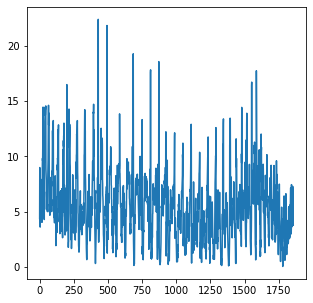

In [20]:
fig = plt.subplots(figsize=(5, 5))
plt.plot(pk_500m_1['value'])
plt.show()

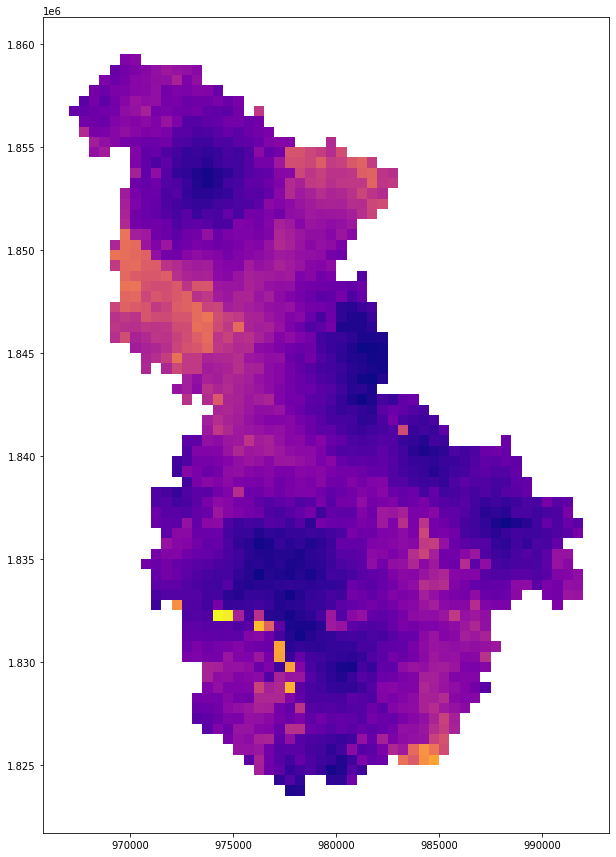

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white') ## 캔버스 색상 설정

pk_500m_1.plot(ax=ax1, color='gainsboro')
pk_500m_1.plot(ax=ax1, column='value', cmap='plasma')

plt.show()

### 위치에 관한 데이터가 POLYGON, 위도/경도, 주소가 존재함

#### POLYGON 좌표로 통일

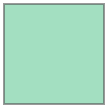

In [22]:
# 인구 격자 100m x 100m 폴리곤 크기
po_100m_1['geometry'][0]

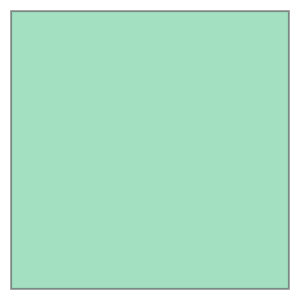

In [23]:
# 주차장 접근성 격자 500m x 500m 폴리곤 크기
parking_500m['geometry'][0]

In [24]:
# POLYGON 데이터 확인

df = pd.DataFrame(structure_100m)
df2 = pd.DataFrame(pk_500m_1)

df['geometry'] = df['geometry'].astype('string')
df2['geometry'] = df2['geometry'].astype('string')

po_100m_1['geometry'][0]
pk_500m_1['geometry'][0]

'POLYGON ((967000 1856500, 967000 1857000, 967500 1857000, 967500 1856500, 967000 1856500))'

In [25]:
# 슬라이싱 예시
int(df['geometry'][0][10:16])

990100

#### 폴리곤 시작점

In [26]:
# 가장 왼쪽의 폴리곤 시작점
poly_left = 1000000
for i, g in enumerate(df['geometry']):
    if int(g[10:16]) < poly_left:
        poly_left = int(g[10:16])

# 가장 아래의 폴리곤 시작점
poly_down = 2000000
for i, g in enumerate(df['geometry']):
    if int(g[17:24]) < poly_down:
        poly_down = int(g[17:24])

# 가장 위의 폴리곤 시작점
poly_up = 1800000
for i, g in enumerate(df['geometry']):
    if int(g[33:40]) > poly_up:
        poly_up = int(g[33:40])
        
# 가장 오른쪽의 폴리곤 시작점
poly_right = 900000
for i, g in enumerate(df['geometry']):
    if int(g[42:48]) > poly_right:
        poly_right = int(g[42:48])

print('poly_left', poly_left)
print('poly_down', poly_down)
print('poly_up', poly_up)
print('poly_right', poly_right)

poly_left 966700
poly_down 1823200
poly_up 1859600
poly_right 992100


In [27]:
print('가로길이', poly_right-poly_left)
print('세로길이', poly_up-poly_down)
print('세종시는 254 * 364의 격자로 표현 가능 (100m x 100m)')

가로길이 25400
세로길이 36400
세종시는 254 * 364의 격자로 표현 가능 (100m x 100m)


In [28]:
# geo데이터는 타입을 변경해야 수정가능

df3 = pd.DataFrame(geo)
df3['geometry'] = df3['geometry'].astype('string')
df3.reset_index(drop=False, inplace=True)

In [29]:
# 슬라이싱 예시
df3['geometry'][0][16:-3].split(', ')[0].split()

['127.30161101266826', '36.582124381608836']

In [30]:
# 세종시는 결과의 위도와 경도 범위에 있음

latitude = []
longitude = []

for g in df3['geometry']:
    for l in g[16:-3].split(', '):
        longitude.append(l.split()[0])
        latitude.append(l.split()[1])
    
print('latitude : ', min(latitude), "~", max(latitude))
print('longitude : ', min(longitude), "~", max(longitude))

latitude :  36.40675835257603 ~ 36.73376199366808
longitude :  127.12765872447403 ~ 127.4092754044858


### Output으로 사용할 충전소 위치 전처리

In [95]:
ev_charger = pd.read_csv('./dataset/충전소 리스트.csv', encoding='utf-8')
ev_charger.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고
0,환경부(한국자동차환경협회),신북보건지소공영주차장,21,DC콤보,전라남도,영암군,전라남도 영암군 신북면 간은정로 21-7,24시간 이용가능,NaN,급속(200kW동시),NaN
1,환경부(한국자동차환경협회),신북보건지소공영주차장,22,DC콤보,전라남도,영암군,전라남도 영암군 신북면 간은정로 21-7,24시간 이용가능,NaN,급속(200kW동시),NaN
2,환경부(한국자동차환경협회),한국생산기술연구원 대경본부바이오메디칼생산기술센터,1,DC콤보,경상북도,영천시,경상북도 영천시 양호길 59,24시간 이용가능,NaN,급속(100kW단독),NaN
3,환경부(한국자동차환경협회),한국생산기술연구원 대경본부바이오메디칼생산기술센터,2,DC콤보,경상북도,영천시,경상북도 영천시 양호길 59,24시간 이용가능,NaN,급속(100kW단독),NaN
4,환경부(한국자동차환경협회),(구)거진수산센터 주차장,11,DC콤보,강원도,고성군,강원도 고성군 거진읍 거진리 22-93,24시간 이용가능,NaN,급속(200kW동시),NaN


#### 세종시는 1380개의 충전기가 존재

In [96]:

ev_charger_sg = ev_charger[ev_charger['지역'] == '세종특별자치시 ']
len(ev_charger_sg)

1380

In [97]:
ev_charger_sg.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고
44,환경부(한국자동차환경협회),LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN
45,환경부(한국자동차환경협회),LH 세종본부,12,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN
420,환경부(한국자동차환경협회),고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN
973,환경부(한국자동차환경협회),금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN
974,환경부(한국자동차환경협회),금암리마을회관주차장,22,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN


#### 세종시는 347개 충전소가 있다고 우선 판단 가능

In [98]:
ev_charger_sg_dd = ev_charger_sg.drop_duplicates(['주소'])
len(ev_charger_sg_dd)

347

In [99]:
ev_charger_sg_dd.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고
44,환경부(한국자동차환경협회),LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN
420,환경부(한국자동차환경협회),고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN
973,환경부(한국자동차환경협회),금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN
1666,환경부(한국자동차환경협회),도담동 싱싱장터주차장,21,DC콤보,세종특별자치시,보듬6로,세종특별자치시 보듬6로 16,24시간 이용가능,NaN,급속(200kW동시),"주간 유료, 야간 무료"
2196,환경부(한국자동차환경협회),명학일반산업단지 관리사무소,21,DC콤보,세종특별자치시,연동면,세종특별자치시 연동면 응암리 916,24시간 이용가능,NaN,급속(200kW동시),NaN


### 주소를 검색하여 위도, 경도를 찾는 웹 크롤링

In [100]:
location = []

browser = webdriver.Chrome('./dataset/chromedriver.exe')

for addr in ev_charger_sg_dd['주소']:
    '''
    addr = addr.split()
    temp = ''
    
    for i, a in enumerate(addr):
        temp += a
        if i < len(addr)-1:
            temp += '+'
    '''
            
    url = 'https://map.naver.com/v5/search/' + addr
    
    browser.get(url)
    time.sleep(2)
    current_url = browser.current_url
    
    browser.get('https://xn--yq5bk9r.com/blog/map-coordinates')
    elem = browser.find_element(By.XPATH, '//*[@id="__next"]/div/div/main/div[3]/article/div/div/div/div[1]/div/div[2]/div[1]/input')
    elem.send_keys(current_url + Keys.TAB + Keys.ENTER)
    time.sleep(3)
    
    try:
        location_text = browser.find_element(By.XPATH, '//*[@id="__next"]/div/div/main/div[3]/article/div/div/div/div[1]/div/div[2]/div[2]/div/div[1]').text
        
    except:
        location_text = '좌표 : 위도 : 0, 경도 : 0'

    print(location_text)
    location.append((location_text.split()[4][:-1], location_text.split()[-1]))

browser.quit()

좌표 : 위도 : 36.49468870000027, 경도 : 127.2645932999995
좌표 : 위도 : 36.59959349999978, 경도 : 127.22725089999949
좌표 : 위도 : 36.438385000000245, 경도 : 127.22032839999963
좌표 : 위도 : 36.51548869999969, 경도 : 127.25912020000005
좌표 : 위도 : 36.54077219999998, 경도 : 127.33563749999936
좌표 : 위도 : 36.543736699999826, 경도 : 127.32968869999964
좌표 : 위도 : 36.49216990000007, 경도 : 127.29946630000012
좌표 : 위도 : 36.4821080999997, 경도 : 127.29089679999969
좌표 : 위도 : 36.435701300000076, 경도 : 127.22860249999991
좌표 : 위도 : 36.48461169999969, 경도 : 127.25199279999987
좌표 : 위도 : 36.599767099999795, 경도 : 127.29931299999954
좌표 : 위도 : 36.49963870000011, 경도 : 127.25910079999935
좌표 : 위도 : 36.50529750000008, 경도 : 127.26095849999983
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 36.49806300000027, 경도 : 127.28160509999972
좌표 : 위도 : 36.50282000000027, 경도 : 127.26986009999942
좌표 : 위도 : 36.506005099999676, 경도 : 127.26428989999955
좌표 : 위도 : 36.50595540000003, 경도 : 127.25851609999992
좌표 : 위도 : 36.50029780000004, 경도 : 127.268210

좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 36.51357979999962, 경도 : 127.26081489999963
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.32122999999983, 경도 : 127.12472569999932
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 36.4839502000001, 경도 : 127.2926292999997
좌표 : 위도 : 0, 경도 : 0
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 0, 경도

In [101]:
location[:5]

[('36.49468870000027', '127.2645932999995'),
 ('36.59959349999978', '127.22725089999949'),
 ('36.438385000000245', '127.22032839999963'),
 ('36.51548869999969', '127.25912020000005'),
 ('36.54077219999998', '127.33563749999936')]

#### GCS 열을 생성하여 위도, 경도를 삽입

In [102]:
ev_charger_sg_dd['GCS'] = location # Geographic Coordinate System
ev_charger_sg_dd.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS
44,환경부(한국자동차환경협회),LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN,"(36.49468870000027, 127.2645932999995)"
420,환경부(한국자동차환경협회),고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN,"(36.59959349999978, 127.22725089999949)"
973,환경부(한국자동차환경협회),금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN,"(36.438385000000245, 127.22032839999963)"
1666,환경부(한국자동차환경협회),도담동 싱싱장터주차장,21,DC콤보,세종특별자치시,보듬6로,세종특별자치시 보듬6로 16,24시간 이용가능,NaN,급속(200kW동시),"주간 유료, 야간 무료","(36.51548869999969, 127.25912020000005)"
2196,환경부(한국자동차환경협회),명학일반산업단지 관리사무소,21,DC콤보,세종특별자치시,연동면,세종특별자치시 연동면 응암리 916,24시간 이용가능,NaN,급속(200kW동시),NaN,"(36.54077219999998, 127.33563749999936)"


#### 위치를 찾을 수 없는 곳은 (0, 0)으로 표시했는데 주소 이름의 문제로 검색이 안되었음

In [103]:
ev_charger_sg_dd[ev_charger_sg_dd.GCS == ('0', '0')]

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS
5056,환경부(한국자동차환경협회),정부세종청사,1,DC차데모+AC3상,세종특별자치시,다솜2로,"세종특별자치시 다솜2로 11, 정부세종청사 종합안내실 정문 우측도보, 정부세종청사 ...",9:00~18:00,NaN,급속(50kW),"주말, 공휴일: 이용불가/노후로 교체예정","(0, 0)"
5057,환경부(한국자동차환경협회),정부세종청사 공정거래위원회,1,DC콤보,세종특별자치시,다솜3로,세종특별자치시 다솜3로 95(어진동)세종특별자치시 다솜2로 94(어진동),24시간 이용가능,NaN,급속(100kW멀티),NaN,"(0, 0)"
5058,환경부(한국자동차환경협회),정부세종청사 교육부,1,DC콤보,세종특별자치시,갈매로,세종특별자치시 갈매로 408(어진동),24시간 이용가능,NaN,급속(100kW멀티),NaN,"(0, 0)"
5059,환경부(한국자동차환경협회),정부세종청사 국세청,1,DC콤보,세종특별자치시,국세청로,세종특별자치시 국세청로 8-14(나성동),24시간 이용가능,NaN,급속(100kW멀티),NaN,"(0, 0)"
5060,환경부(한국자동차환경협회),정부세종청사 농림축산식품부/해양수산부,1,DC콤보,세종특별자치시,다솜2로,세종특별자치시 다솜2로 94(어진동),24시간 이용가능,NaN,급속(100kW멀티),NaN,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...
129073,한국전자금융,세종 센트럴테라스,1,AC완속,세종특별자치시,대평4길,세종특별자치시 대평4길 17센트럴테라스(679 센트럴테라스),24시간 이용가능,NaN,7kW,NaN,"(0, 0)"
129075,한국전자금융,세종 우빈가온,1,AC완속,세종특별자치시,한누리대로,세종특별자치시 한누리대로 201우빈가온(715 우빈가온),24시간 이용가능,NaN,7kW,NaN,"(0, 0)"
129078,한국전자금융,세종 판타지타워,1,AC완속,세종특별자치시,한누리대로,세종특별자치시 한누리대로 2257판타지타워(699 판타지타워),24시간 이용가능,NaN,7kW,NaN,"(0, 0)"
129081,한국전자금융,세종 펠리체타워1,1,AC완속,세종특별자치시,대평로,세종특별자치시 대평로 71펠리체타워1(687 펠리체타워1),24시간 이용가능,NaN,7kW,NaN,"(0, 0)"


#### 주소를 다음과 같이 변경

In [104]:
print(ev_charger_sg_dd['주소'].loc[5057])
print('↓')
print(ev_charger_sg_dd['주소'].loc[5057].split(',')[0].split('(')[0])

세종특별자치시 다솜3로 95(어진동)세종특별자치시 다솜2로 94(어진동)
↓
세종특별자치시 다솜3로 95


In [105]:
browser = webdriver.Chrome('./dataset/chromedriver.exe')

for i in ev_charger_sg_dd[ev_charger_sg_dd.GCS == ('0', '0')].index:
    
    addr = ev_charger_sg_dd['주소'].loc[i].split(',')[0].split('(')[0]
    
    url = 'https://map.naver.com/v5/search/' + addr
    
    browser.get(url)
    time.sleep(2)
    current_url = browser.current_url
    
    browser.get('https://xn--yq5bk9r.com/blog/map-coordinates')
    elem = browser.find_element(By.XPATH, '//*[@id="__next"]/div/div/main/div[3]/article/div/div/div/div[1]/div/div[2]/div[1]/input')
    elem.send_keys(current_url + Keys.TAB + Keys.ENTER)
    time.sleep(3)
    
    try:
        location_text = browser.find_element(By.XPATH, '//*[@id="__next"]/div/div/main/div[3]/article/div/div/div/div[1]/div/div[2]/div[2]/div/div[1]').text
        
    except:
        location_text = '좌표 : 위도 : 0, 경도 : 0'

    print(location_text)    
    ev_charger_sg_dd['GCS'].loc[i] = (location_text.split()[4][:-1], location_text.split()[-1])

browser.quit()

좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 36.504252199999875, 경도 : 127.26643939999992
좌표 : 위도 : 36.49905729999989, 경도 : 127.26457770000002
좌표 : 위도 : 36.485273699999965, 경도 : 127.2582090999997
좌표 : 위도 : 36.50464530000004, 경도 : 127.26364119999936
좌표 : 위도 : 36.49784919999978, 경도 : 127.26427089999979
좌표 : 위도 : 36.484163500000186, 경도 : 127.26039459999943
좌표 : 위도 : 36.48143850000002, 경도 : 127.26159809999973
좌표 : 위도 : 36.48143850000002, 경도 : 127.26159809999973
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 36.5176504999998, 경도 : 127.23681899999987
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 36.50233139999974, 경도 : 127.24834130000015
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌표 : 위도 : 37.4040625999996, 경도 : 126.94139119999966
좌

좌표 : 위도 : 36.50366259999994, 경도 : 127.2316341
좌표 : 위도 : 36.4882669000002, 경도 : 127.26413849999963
좌표 : 위도 : 36.51268190000017, 경도 : 127.25548489999989
좌표 : 위도 : 36.514027699999716, 경도 : 127.25534550000003
좌표 : 위도 : 36.5117880999996, 경도 : 127.25940839999963
좌표 : 위도 : 36.509862699999694, 경도 : 127.26374369999931
좌표 : 위도 : 36.51007020000028, 경도 : 127.25514589999969
좌표 : 위도 : 36.515545200000076, 경도 : 127.25525309999958
좌표 : 위도 : 36.4628486000002, 경도 : 127.27791439999945
좌표 : 위도 : 36.51050460000026, 경도 : 127.24914059999934
좌표 : 위도 : 36.508817699999874, 경도 : 127.2464036999998
좌표 : 위도 : 36.48890949999959, 경도 : 127.24935789999981
좌표 : 위도 : 36.48932500000004, 경도 : 127.25260659999945
좌표 : 위도 : 36.4879080999999, 경도 : 127.25465600000004
좌표 : 위도 : 36.4812728000002, 경도 : 127.24622210000007
좌표 : 위도 : 37.32122999999983, 경도 : 127.12472569999932
좌표 : 위도 : 36.48401030000008, 경도 : 127.25550049999937
좌표 : 위도 : 36.48093169999961, 경도 : 127.30370389999932
좌표 : 위도 : 36.496335800000146, 경도 : 127.2623026999996
좌표

In [106]:
ev_charger_sg_dd.reset_index(drop=False, inplace=True)

#### 여전히 주소를 못 찾은 곳이 있었지만 6개밖에 없어서 직접 수정

In [107]:
ev_charger_sg_dd[ev_charger_sg_dd['GCS'] == ('0', '0')]

,index,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS


In [123]:
ev_charger_sg_dd['GCS'].loc[40] = ('36.5176504999998', '127.23681899999987')
ev_charger_sg_dd['GCS'].loc[149] = ('36.51420640000002', '127.25755629999962')
ev_charger_sg_dd['GCS'].loc[229] = ('36.48445770000006', '127.25655059999953')
ev_charger_sg_dd['GCS'].loc[239] = ('36.50705740000009', '127.23799990000006')
ev_charger_sg_dd['GCS'].loc[275] = ('36.48093169999961', '127.30474989999959')
ev_charger_sg_dd['GCS'].loc[340] = ('36.512851500000224', '127.25414099999965')

In [125]:
ev_charger_sg_dd['GCS'].loc[0]

('36.49468870000027', '127.2645932999995')

#### 모든 주소에 대응하는 좌표를 찾았음을 확인

In [109]:
ev_charger_sg_dd[ev_charger_sg_dd['GCS'] == ('0', '0')]

,index,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS


#### 데이터를 확인해보니, 크롤링 중 장소를 찾지 못한 곳은 세종시를 벗어난 좌표로 입력되었음이 확인됨 -> 수정

In [138]:
uncorrected = []

for i, GCS in enumerate(ev_charger_sg_dd['GCS']):
    if float(GCS[0]) > 36.73376199366808:
        uncorrected.append(i)

In [140]:
print(uncorrected)

[13, 19, 20, 21, 36, 37, 38, 39, 41, 44, 45, 49, 51, 53, 58, 60, 62, 65, 67, 70, 71, 72, 80, 82, 92, 97, 99, 100, 115, 117, 145, 152, 172, 175, 176, 177, 178, 200, 230, 267, 269, 270, 271, 272, 276, 277, 278, 279, 280, 281, 286, 291, 292, 308, 313, 323, 324, 325, 342]


In [194]:
ev_charger_sg_dd['GCS'].loc[13] = ('36.4909963999996', '127.26840099999957')
ev_charger_sg_dd['GCS'].loc[19] = ('36.522604000000015', '127.26327879999994')
ev_charger_sg_dd['GCS'].loc[20] = ('36.53482890000013', '127.23519810000009')
ev_charger_sg_dd['GCS'].loc[21] = ('36.50479809999993', '127.2618747999997')
ev_charger_sg_dd['GCS'].loc[36] = ('36.5134107999997', '127.22823530000007')
ev_charger_sg_dd['GCS'].loc[37] = ('36.51199240000015', '127.22567339999972')
ev_charger_sg_dd['GCS'].loc[38] = ('36.518056599999646', '127.23254189999959')
ev_charger_sg_dd['GCS'].loc[39] = ('36.5162945999997', '127.23624839999938')
ev_charger_sg_dd['GCS'].loc[41] = ('36.519642299999695', '127.23539559999982')
ev_charger_sg_dd['GCS'].loc[44] = ('36.50627390000004', '127.23460489999954')
ev_charger_sg_dd['GCS'].loc[45] = ('36.51092240000024', '127.2209318999997')
ev_charger_sg_dd['GCS'].loc[49] = ('36.50564190000019', '127.24751209999985')
ev_charger_sg_dd['GCS'].loc[51] = ('36.50436150000021', '127.23902059999959')
ev_charger_sg_dd['GCS'].loc[53] = ('36.500301599999894', '127.24906589999989')
ev_charger_sg_dd['GCS'].loc[58] = ('36.51469170000016', '127.26174279999957')
ev_charger_sg_dd['GCS'].loc[60] = ('36.5147465999997', '127.26330659999952')
ev_charger_sg_dd['GCS'].loc[62] = ('36.51533990000013', '127.25889149999955')
ev_charger_sg_dd['GCS'].loc[65] = ('36.5171367999996', '127.25514749999981')
ev_charger_sg_dd['GCS'].loc[67] = ('36.509874599999684', '127.25854010000015')
ev_charger_sg_dd['GCS'].loc[70] = ('36.51613240000004', '127.24148599999957')
ev_charger_sg_dd['GCS'].loc[71] = ('36.51665699999964', '127.24706169999943')
ev_charger_sg_dd['GCS'].loc[72] = ('36.51344099999958', '127.24648210000001')
ev_charger_sg_dd['GCS'].loc[80] = ('36.48942059999998', '127.24274109999963')
ev_charger_sg_dd['GCS'].loc[82] = ('36.490234399999636', '127.29927540000004')
ev_charger_sg_dd['GCS'].loc[92] = ('36.602512499999854', '127.29202979999997')
ev_charger_sg_dd['GCS'].loc[97] = ('36.516656100000226', '127.22842019999962')
ev_charger_sg_dd['GCS'].loc[99] = ('36.47891159999972', '127.25693559999992')
ev_charger_sg_dd['GCS'].loc[100] = ('36.47570240000019', '127.24746600000007')
ev_charger_sg_dd['GCS'].loc[115] = ('36.519364100000246', '127.23988010000016')
ev_charger_sg_dd['GCS'].loc[117] = ('36.529794400000085', '127.35970419999958')
ev_charger_sg_dd['GCS'].loc[145] = ('36.509862699999694', '127.26374369999931')
ev_charger_sg_dd['GCS'].loc[152] = ('36.595695299999896', '127.28430099999945')
ev_charger_sg_dd['GCS'].loc[172] = ('36.559373599999745', '127.27901069999986')
ev_charger_sg_dd['GCS'].loc[175] = ('36.48220770000011', '127.29679159999944')
ev_charger_sg_dd['GCS'].loc[176] = ('36.48220770000011', '127.29679159999944')
ev_charger_sg_dd['GCS'].loc[177] = ('36.48220770000011', '127.29679159999944')
ev_charger_sg_dd['GCS'].loc[178] = ('36.48220770000011', '127.29679159999944')
ev_charger_sg_dd['GCS'].loc[200] = ('36.47921409999985', '127.29131139999983')
ev_charger_sg_dd['GCS'].loc[230] = ('36.48401030000008', '127.25550049999937')
ev_charger_sg_dd['GCS'].loc[267] = ('36.48980019999993', '127.25407000000008')
ev_charger_sg_dd['GCS'].loc[269] = ('36.48799049999996', '127.24376009999946')
ev_charger_sg_dd['GCS'].loc[270] = ('36.48863980000002', '127.2466074999996')
ev_charger_sg_dd['GCS'].loc[271] = ('36.48863980000002', '127.2466074999996')
ev_charger_sg_dd['GCS'].loc[272] = ('36.48863980000002', '127.2466074999996')
ev_charger_sg_dd['GCS'].loc[276] = ('36.48992880000015', '127.29801700000017')
ev_charger_sg_dd['GCS'].loc[277] = ('36.506116899999846', '127.24501679999963')
ev_charger_sg_dd['GCS'].loc[278] = ('36.50705740000009', '127.23799990000006')
ev_charger_sg_dd['GCS'].loc[279] = ('36.5910495999999', '127.29170359999992')
ev_charger_sg_dd['GCS'].loc[280] = ('36.468882899999606', '127.28091920000004')
ev_charger_sg_dd['GCS'].loc[281] = ('36.478038800000206', '127.28490119999968')
ev_charger_sg_dd['GCS'].loc[286] = ('36.62731739999959', '127.28843199999973')
ev_charger_sg_dd['GCS'].loc[291] = ('36.476092799999606', '127.2471638999998')
ev_charger_sg_dd['GCS'].loc[292] = ('36.476092799999606', '127.2471638999998')
ev_charger_sg_dd['GCS'].loc[308] = ('36.54384530000025', '127.3350013999993')
ev_charger_sg_dd['GCS'].loc[313] = ('36.48054880000023', '127.28347669999998')
ev_charger_sg_dd['GCS'].loc[323] = ('36.514048099999805', '127.27026749999987')
ev_charger_sg_dd['GCS'].loc[324] = ('36.478170399999705', '127.2553922999994')
ev_charger_sg_dd['GCS'].loc[325] = ('36.478170399999705', '127.2553922999994')
ev_charger_sg_dd['GCS'].loc[342] = ('36.47325169999979', '127.26758069999954')

#### 좌표가 중복되는 곳이 있음 ( 주소가 다르지만 사실 같은 주소인 경우가 있음)

##### ex) 신흥리, 푸르지오1차)지하 1층 101동, 신흥리, 푸르지오1차)지하 1층 102동 

In [196]:
# 중복 확인
len(ev_charger_sg_dd[ev_charger_sg_dd['GCS'].duplicated()])

52

In [197]:
ev_charger_sg_dd[ev_charger_sg_dd['GCS'].duplicated()].head()

,index,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS
30,5537,환경부(한국자동차환경협회),첫마을 BRT 환승주차장 B,1,DC차데모+AC3상+DC콤보,세종특별자치시,나성남로,세종특별자치시 나성남로 7-7 BRT환승센터 B주차장 B1 (나성동 778),24시간 이용가능,NaN,급속(50kW),"주차요금 : 15분당 300원, 2시간 초과시 15분당 400원/노후로 교체예정","(36.48143850000002, 127.26159809999973)"
34,9424,한국전력,2생활권 환승주차장,1,DC차데모+AC3상+DC콤보,세종특별자치시,나성동,세종특별자치시 나성동 535,24시간 이용가능,NaN,NaN,NaN,"(36.48143850000002, 127.26159809999973)"
126,33929,차지비,조치원신흥푸르지오101동,2,AC완속,세종특별자치시,조치원읍,"세종특별자치시 조치원읍 도원1로 16 (신흥리, 푸르지오1차)지하 1층 101동 A...",24시간 이용가능,NaN,NaN,입주민 등 거주자 외 출입 제한,"(36.59232300000019, 127.28753990000007)"
127,33932,차지비,조치원신흥푸르지오107동,2,AC완속,세종특별자치시,조치원읍,"세종특별자치시 조치원읍 도원1로 16 (신흥리, 푸르지오1차)지하 1층 104동 C...",24시간 이용가능,NaN,NaN,입주민 등 거주자 외 출입 제한,"(36.59232300000019, 127.28753990000007)"
128,33934,차지비,조치원신흥푸르지오112동,1,AC완속,세종특별자치시,조치원읍,"세종특별자치시 조치원읍 도원1로 16 (신흥리, 푸르지오1차)지하 1층 112동 1...",24시간 이용가능,NaN,NaN,입주민 등 거주자 외 출입 제한,"(36.59232300000019, 127.28753990000007)"


In [198]:
# 중복 제거
ev_charger_sg_dd = ev_charger_sg_dd.drop_duplicates(['GCS'])

####  129689(전국 충전기 수) -> 1380(세종시 내 충전기 수) -> 전처리 결과  세종시 내 충전소는 295곳으로 집계 됨

In [199]:
print(len(ev_charger_sg_dd))
ev_charger_sg_dd.head()

295


,index,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS
0,44,환경부(한국자동차환경협회),LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN,"(36.49468870000027, 127.2645932999995)"
1,420,환경부(한국자동차환경협회),고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN,"(36.59959349999978, 127.22725089999949)"
2,973,환경부(한국자동차환경협회),금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN,"(36.438385000000245, 127.22032839999963)"
3,1666,환경부(한국자동차환경협회),도담동 싱싱장터주차장,21,DC콤보,세종특별자치시,보듬6로,세종특별자치시 보듬6로 16,24시간 이용가능,NaN,급속(200kW동시),"주간 유료, 야간 무료","(36.51548869999969, 127.25912020000005)"
4,2196,환경부(한국자동차환경협회),명학일반산업단지 관리사무소,21,DC콤보,세종특별자치시,연동면,세종특별자치시 연동면 응암리 916,24시간 이용가능,NaN,급속(200kW동시),NaN,"(36.54077219999998, 127.33563749999936)"


In [244]:
### 저장
ev_charger_sg_dd.to_csv('C:/Users/sajah/Desktop/develop/python/데이터청년캠퍼스/프로젝트/데이터/세종시충전소위치.csv', header = True, index = False)

In [245]:
ev_charger = pd.read_csv('C:/Users/sajah/Desktop/develop/python/데이터청년캠퍼스/프로젝트/데이터/세종시충전소위치.csv')

In [246]:
ev_charger = ev_charger[ev_charger.columns[1:]]
ev_charger.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS
0,환경부(한국자동차환경협회),LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.49468870000027', '127.2645932999995')"
1,환경부(한국자동차환경협회),고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN,"('36.59959349999978', '127.22725089999949')"
2,환경부(한국자동차환경협회),금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.438385000000245', '127.22032839999963')"
3,환경부(한국자동차환경협회),도담동 싱싱장터주차장,21,DC콤보,세종특별자치시,보듬6로,세종특별자치시 보듬6로 16,24시간 이용가능,NaN,급속(200kW동시),"주간 유료, 야간 무료","('36.51548869999969', '127.25912020000005')"
4,환경부(한국자동차환경협회),명학일반산업단지 관리사무소,21,DC콤보,세종특별자치시,연동면,세종특별자치시 연동면 응암리 916,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.54077219999998', '127.33563749999936')"


### 위도/경도를 POLYGON 좌표로 치환

In [247]:
poly = []

# 한 격자당 위도 변화
length_100m = (36.73376199366808 - 36.40675835257603) / 364

# 한 격자당 경도 변화
width_100m = (127.4092754044858 - 127.12765872447403) / 254

for i, GCS in enumerate(ev_charger['GCS']):
    poly_x = 966700 + (float(GCS.split()[1][1:-2]) - 127.12765872447403)/width_100m * 100
    poly_y = 1823200 + (float(GCS.split()[0][2:-2]) - 36.40675835257603)/length_100m * 100
    #print('(', GCS.split()[0][2:-2] + ",", GCS.split()[1][1:-2], ')', end=('→'))
    #print('(', poly_y, ",", poly_x, ')')
    poly.append((poly_x, poly_y))

In [248]:
ev_charger['POLYGON'] = poly
ev_charger.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS,POLYGON
0,환경부(한국자동차환경협회),LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.49468870000027', '127.2645932999995')","(979050.6115411974, 1832987.8562928336)"
1,환경부(한국자동차환경협회),고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN,"('36.59959349999978', '127.22725089999949')","(975682.5689949933, 1844665.202475371)"
2,환경부(한국자동차환경협회),금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.438385000000245', '127.22032839999963')","(975058.2043444724, 1826720.480574458)"
3,환경부(한국자동차환경협회),도담동 싱싱장터주차장,21,DC콤보,세종특별자치시,보듬6로,세종특별자치시 보듬6로 16,24시간 이용가능,NaN,급속(200kW동시),"주간 유료, 야간 무료","('36.51548869999969', '127.25912020000005')","(978556.9733803463, 1835303.1821939477)"
4,환경부(한국자동차환경협회),명학일반산업단지 관리사무소,21,DC콤보,세종특별자치시,연동면,세종특별자치시 연동면 응암리 916,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.54077219999998', '127.33563749999936')","(985458.3381002956, 1838117.5832719812)"


In [249]:
ev_charger.to_csv('C:/Users/sajah/Desktop/develop/python/데이터청년캠퍼스/프로젝트/데이터/세종시충전소위치.csv', header = True, index = False)

In [250]:
ev_charger = pd.read_csv('C:/Users/sajah/Desktop/develop/python/데이터청년캠퍼스/프로젝트/데이터/세종시충전소위치.csv')
ev_charger = ev_charger[ev_charger.columns[1:]]
ev_charger.head()

,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,충전용량,비고,GCS,POLYGON
0,LH 세종본부,11,DC콤보,세종특별자치시,가름로,세종특별자치시 가름로 238-1,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.49468870000027', '127.2645932999995')","(979050.6115411974, 1832987.8562928336)"
1,고복저수지 연기대첩비공원 주차장,1,DC콤보,세종특별자치시,연서면,세종특별자치시 연서면 용암리 208-5,24시간 이용가능,NaN,급속(100kW멀티),NaN,"('36.59959349999978', '127.22725089999949')","(975682.5689949933, 1844665.202475371)"
2,금암리마을회관주차장,21,DC콤보,세종특별자치시,장군면,세종특별자치시 장군면 정자말길 6,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.438385000000245', '127.22032839999963')","(975058.2043444724, 1826720.480574458)"
3,도담동 싱싱장터주차장,21,DC콤보,세종특별자치시,보듬6로,세종특별자치시 보듬6로 16,24시간 이용가능,NaN,급속(200kW동시),"주간 유료, 야간 무료","('36.51548869999969', '127.25912020000005')","(978556.9733803463, 1835303.1821939477)"
4,명학일반산업단지 관리사무소,21,DC콤보,세종특별자치시,연동면,세종특별자치시 연동면 응암리 916,24시간 이용가능,NaN,급속(200kW동시),NaN,"('36.54077219999998', '127.33563749999936')","(985458.3381002956, 1838117.5832719812)"


#### 데이터 병합

In [269]:
# geometry는 type 상 기준으로 삼을 수 없음

po = pd.DataFrame(population_100m)
st = pd.DataFrame(structure_100m)

population_100m['geo'] = po['geometry'].astype('string')
structure_100m['geo'] = st['geometry'].astype('string')
population_100m.rename(columns={'val':'인구수'}, inplace=True)

structure_100m = structure_100m[['geometry', 'val', 'geo']]
structure_100m.rename(columns={'val':'건축물수'}, inplace=True)
structure_100m.rename(columns={'geometry':'geometry_y'}, inplace=True)

In [272]:
material = pd.merge(population_100m, structure_100m, on='geo')
material.drop(['geometry_y'], axis=1, inplace=True)
material.head()

,geometry,인구수,geo,건축물수
0,"POLYGON ((977800.000 1828600.000, 977800.000 1...",0.0,"POLYGON ((977800 1828600, 977800 1828700, 9779...",1.0
1,"POLYGON ((990100.000 1837300.000, 990100.000 1...",0.0,"POLYGON ((990100 1837300, 990100 1837400, 9902...",1.0
2,"POLYGON ((980600.000 1843000.000, 980600.000 1...",27.0,"POLYGON ((980600 1843000, 980600 1843100, 9807...",4.0
3,"POLYGON ((983800.000 1830600.000, 983800.000 1...",0.0,"POLYGON ((983800 1830600, 983800 1830700, 9839...",3.0
4,"POLYGON ((969300.000 1857700.000, 969300.000 1...",27.0,"POLYGON ((969300 1857700, 969300 1857800, 9694...",20.0


In [303]:
EV = []
for g in material.geo:
    g = g.split()
    # print(g[1][2:], g[2][:-1], g[4][:-1], g[5]) # 폴리곤의 좌측x, 하단y, 상단y, 우측x 좌표
    temp = 0
    for p in ev_charger.POLYGON:
        p = p.split()
        x = int(float(p[0][1:-1]))
        y = int(float(p[1][:-1]))
        
        if x>int(g[1][2:]) and x<int(g[5]) and y>int(g[2][:-1]) and y<int(g[4][:-1]):
            temp = 1
            break
            
    EV.append(temp)

In [306]:
material[material['EV']==1]

,geometry,인구수,geo,건축물수,EV
67,"POLYGON ((977900.000 1832600.000, 977900.000 1...",181.0,"POLYGON ((977900 1832600, 977900 1832700, 9780...",1.0,1
78,"POLYGON ((981900.000 1843500.000, 981900.000 1...",529.0,"POLYGON ((981900 1843500, 981900 1843600, 9820...",4.0,1
105,"POLYGON ((977600.000 1833900.000, 977600.000 1...",134.0,"POLYGON ((977600 1833900, 977600 1834000, 9777...",4.0,1
290,"POLYGON ((981000.000 1845000.000, 981000.000 1...",19.0,"POLYGON ((981000 1845000, 981000 1845100, 9811...",1.0,1
301,"POLYGON ((976900.000 1833800.000, 976900.000 1...",208.0,"POLYGON ((976900 1833800, 976900 1833900, 9770...",1.0,1
...,...,...,...,...,...
46741,"POLYGON ((978200.000 1835300.000, 978200.000 1...",NaN,"POLYGON ((978200 1835300, 978200 1835400, 9783...",NaN,1
46924,"POLYGON ((980700.000 1831400.000, 980700.000 1...",NaN,"POLYGON ((980700 1831400, 980700 1831500, 9808...",NaN,1
47003,"POLYGON ((978000.000 1835500.000, 978000.000 1...",NaN,"POLYGON ((978000 1835500, 978000 1835600, 9781...",NaN,1
47170,"POLYGON ((984400.000 1832500.000, 984400.000 1...",NaN,"POLYGON ((984400 1832500, 984400 1832600, 9845...",NaN,1


In [305]:
material['EV'] = EV
material.head()

,geometry,인구수,geo,건축물수,EV
0,"POLYGON ((977800.000 1828600.000, 977800.000 1...",0.0,"POLYGON ((977800 1828600, 977800 1828700, 9779...",1.0,0
1,"POLYGON ((990100.000 1837300.000, 990100.000 1...",0.0,"POLYGON ((990100 1837300, 990100 1837400, 9902...",1.0,0
2,"POLYGON ((980600.000 1843000.000, 980600.000 1...",27.0,"POLYGON ((980600 1843000, 980600 1843100, 9807...",4.0,0
3,"POLYGON ((983800.000 1830600.000, 983800.000 1...",0.0,"POLYGON ((983800 1830600, 983800 1830700, 9839...",3.0,0
4,"POLYGON ((969300.000 1857700.000, 969300.000 1...",27.0,"POLYGON ((969300 1857700, 969300 1857800, 9694...",20.0,0


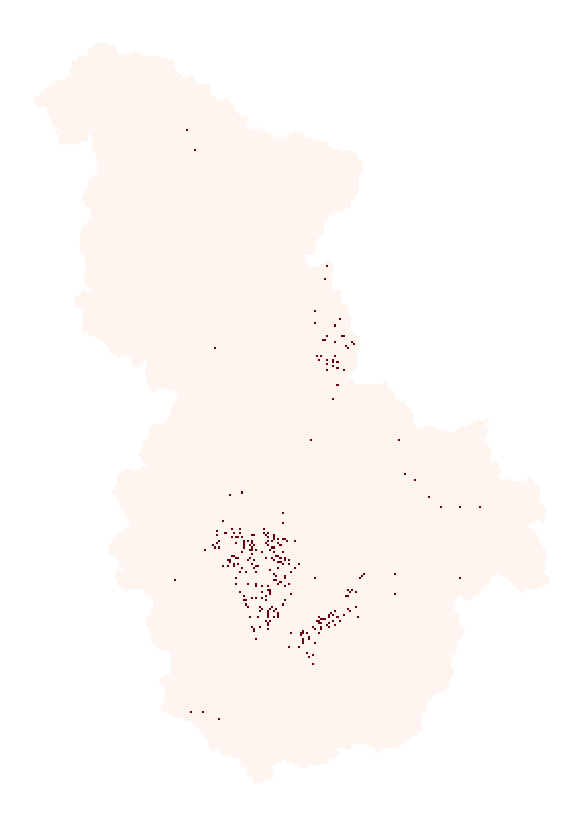

In [307]:
fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white') ## 캔버스 색상 설정

material.plot(ax=ax1, color='gainsboro')
material.plot(ax=ax1, column='EV', cmap='Reds')
ax1.set_axis_off()
plt.show()